Once deleted, variables cannot be recovered. Proceed (y/[n])? y


C:\Users\User\AppData\Local\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


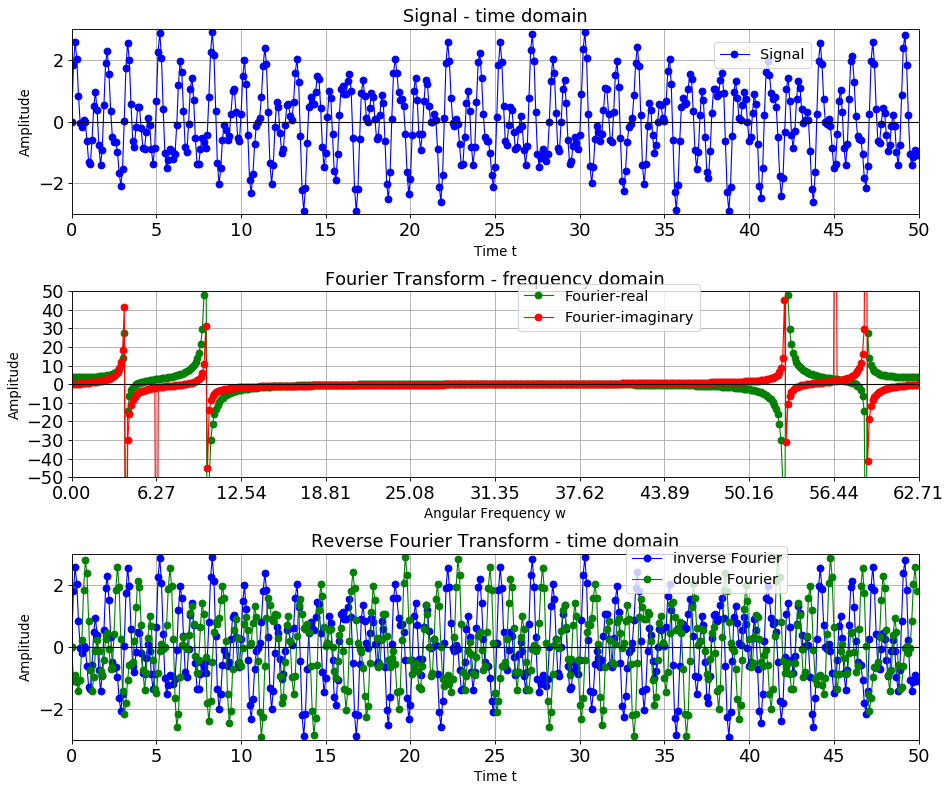

In [1]:
#1D fourier transform
%reset
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

global i
i = np.complex(0,1)

################################################## data

#function
function = lambda t,T: np.sin(4*t) + np.sin(np.pi*2*t) + np.sin(10*t) ###function

#setup
N=500; ###samples
T=50; ###interval

###discrete time values
t=np.linspace(0,(N-1)*T/N,N)

#n=np.linspace(0,N-1,N)
n=np.arange(N)
k=n.reshape((N,1))

###discrete angular frequencies
w=n*2*np.pi/T ###angular frequency

##################################################fourier
#fourier coefficients
fourier=np.matmul(np.transpose(np.exp(-i*k*n*2*np.pi/N)),function(n*T/N,T))

reverse=np.matmul(np.exp(i*k*n*2*np.pi/N),fourier)/N
two_fourier=np.matmul(np.exp(-i*k*n*2*np.pi/N),fourier)/N



################################################## plot
fig, ax = plt.subplots(3,1, num=None, figsize=(12,10), dpi=80, facecolor='w', edgecolor='k')

#functions
ax[0].plot(t,function(t,T),color="blue",label="Signal", linewidth=1, marker='o')
ax[0].axhline(0, color='black', lw=1)

ax[0].legend(fontsize=13, bbox_to_anchor=(0.75,0.75))
ax[0].set_title('Signal - time domain', fontsize=16)
ax[0].set_xlabel('Time t', fontsize=12)
ax[0].set_ylabel('Amplitude', fontsize=12)
ax[0].tick_params(axis='both', which='major', labelsize=16)

ax[0].set_xticks(np.linspace(0,T,11))
ax[0].set_yticks([-2,0,2])
ax[0].set_xlim(0,T)
ax[0].set_ylim(-3,3)
ax[0].grid(True)


#functions
ax[1].plot(w,np.real(fourier),color="green",label="Fourier-real", linewidth=1, marker='o')
ax[1].plot(w,np.imag(fourier),color="red",label="Fourier-imaginary", linewidth=1, marker='o')
ax[1].axhline(0, color='black', lw=1)

ax[1].legend(fontsize=13, bbox_to_anchor=(0.75,0.75))
ax[1].set_title('Fourier Transform - frequency domain', fontsize=16)
ax[1].set_xlabel('Angular Frequency w', fontsize=12)
ax[1].set_ylabel('Amplitude', fontsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=16)

ax[1].set_xticks(np.linspace(0,(N-1)*2*np.pi/T,11))
ax[1].set_yticks(np.arange(-50,60,10))
ax[1].set_xlim(0,(N-1)*2*np.pi/T)
ax[1].set_ylim(-50,50)
ax[1].grid(True)


#functions
ax[2].plot(t,reverse,color="blue",label="inverse Fourier", linewidth=1, marker='o')
ax[2].plot(t,two_fourier,color="green",label="double Fourier", linewidth=1, marker='o')
ax[2].axhline(0, color='black', lw=1)

ax[2].legend(fontsize=13, bbox_to_anchor=(0.75,0.75))
ax[2].set_title('Reverse Fourier Transform - time domain', fontsize=16)
ax[2].set_xlabel('Time t', fontsize=12)
ax[2].set_ylabel('Amplitude', fontsize=12)
ax[2].tick_params(axis='both', which='major', labelsize=16)

ax[2].set_xticks(np.linspace(0,T,11))
ax[2].set_yticks([-2,0,2])
ax[2].set_xlim(0,T)
ax[2].set_ylim(-3,3)
ax[2].grid(True)


fig.gca().set_autoscale_on(False)
plt.tight_layout() #rescale subplots
plt.show()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


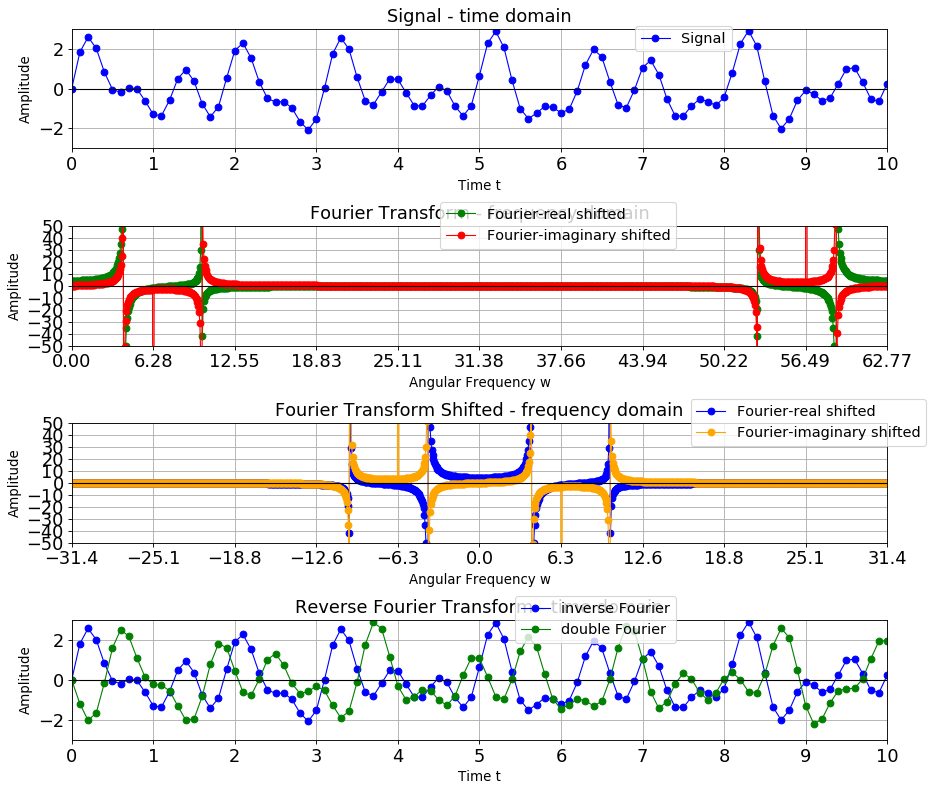

In [2]:
#1D fourier transform with numpy
%reset
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

global i
i = np.complex(0,1)

################################################## data

#function
function = lambda t,T: np.sin(4*t) + np.sin(np.pi*2*t) + np.sin(10*t) ###function

#setup
N=1000; ###samples
T=100; ###interval

###discrete time values
t=np.linspace(0,(N-1)*T/N,N)

#n=np.linspace(0,N-1,N)
n=np.arange(N)
k=n.reshape((N,1))

###discrete angular frequencies
w=n*2*np.pi/T ###angular frequency
w_mod=np.linspace(-np.pi/T*(N-1),np.pi/T*(N-1),N) ###angular frequency

################################################## fourier
fourier = np.fft.fft(function(t,T))
fourier_shift = np.fft.fftshift(fourier)

reverse= np.fft.ifft(fourier)
two_fourier= np.fft.fft(fourier)/N

################################################## plot
fig, ax = plt.subplots(4,1, num=None, figsize=(12,10), dpi=80, facecolor='w', edgecolor='k')

#functions
ax[0].plot(t,function(t,T),color="blue",label="Signal", linewidth=1, marker='o')
ax[0].axhline(0, color='black', lw=1)

ax[0].legend(fontsize=13, bbox_to_anchor=(0.75,0.75))
ax[0].set_title('Signal - time domain', fontsize=16)
ax[0].set_xlabel('Time t', fontsize=12)
ax[0].set_ylabel('Amplitude', fontsize=12)
ax[0].tick_params(axis='both', which='major', labelsize=16)

ax[0].set_xticks(np.linspace(0,N/T,11))
ax[0].set_yticks([-2,0,2])
ax[0].set_xlim(0,N/T)
ax[0].set_ylim(-3,3)
ax[0].grid(True)


#functions
ax[1].plot(w,np.real(fourier),color="green",label="Fourier-real shifted", linewidth=1, marker='o')
ax[1].plot(w,np.imag(fourier),color="red",label="Fourier-imaginary shifted", linewidth=1, marker='o')
ax[1].axhline(0, color='black', lw=1)

ax[1].legend(fontsize=13, bbox_to_anchor=(0.75,0.75))
ax[1].set_title('Fourier Transform - frequency domain', fontsize=16)
ax[1].set_xlabel('Angular Frequency w', fontsize=12)
ax[1].set_ylabel('Amplitude', fontsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=16)

ax[1].set_xticks(np.linspace(0,(N-1)*2*np.pi/T,11))
ax[1].set_yticks(np.arange(-50,60,10))
ax[1].set_xlim(0,(N-1)*2*np.pi/T)
ax[1].set_ylim(-50,50)
ax[1].grid(True)



#functions
ax[2].plot(w_mod,np.real(fourier_shift),color="blue",label="Fourier-real shifted", linewidth=1, marker='o')
ax[2].plot(w_mod,np.imag(fourier_shift),color="orange",label="Fourier-imaginary shifted", linewidth=1, marker='o')
ax[2].axhline(0, color='black', lw=1)

ax[2].legend(fontsize=13, bbox_to_anchor=(0.75,0.75))
ax[2].set_title('Fourier Transform Shifted - frequency domain', fontsize=16)
ax[2].set_xlabel('Angular Frequency w', fontsize=12)
ax[2].set_ylabel('Amplitude', fontsize=12)
ax[2].tick_params(axis='both', which='major', labelsize=16)

ax[2].set_xticks(np.linspace(-(N-1)*2*np.pi/T,(N-1)*2*np.pi/T,21))
ax[2].set_yticks(np.arange(-50,60,10))
ax[2].set_xlim(-(N-1)*np.pi/T,(N-1)*np.pi/T)
ax[2].set_ylim(-50,50)
ax[2].grid(True)


#functions
ax[3].plot(t,reverse,color="blue",label="inverse Fourier", linewidth=1, marker='o')
ax[3].plot(t,two_fourier,color="green",label="double Fourier", linewidth=1, marker='o')
ax[3].axhline(0, color='black', lw=1)

ax[3].legend(fontsize=13, bbox_to_anchor=(0.75,0.75))
ax[3].set_title('Reverse Fourier Transform - time domain', fontsize=16)
ax[3].set_xlabel('Time t', fontsize=12)
ax[3].set_ylabel('Amplitude', fontsize=12)
ax[3].tick_params(axis='both', which='major', labelsize=16)

ax[3].set_xticks(np.linspace(0,N/T,11))
ax[3].set_yticks([-2,0,2])
ax[3].set_xlim(0,N/T)
ax[3].set_ylim(-3,3)
ax[3].grid(True)


fig.gca().set_autoscale_on(False)
plt.tight_layout() #rescale subplots
plt.show()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


<function matplotlib.pyplot.show(*args, **kw)>

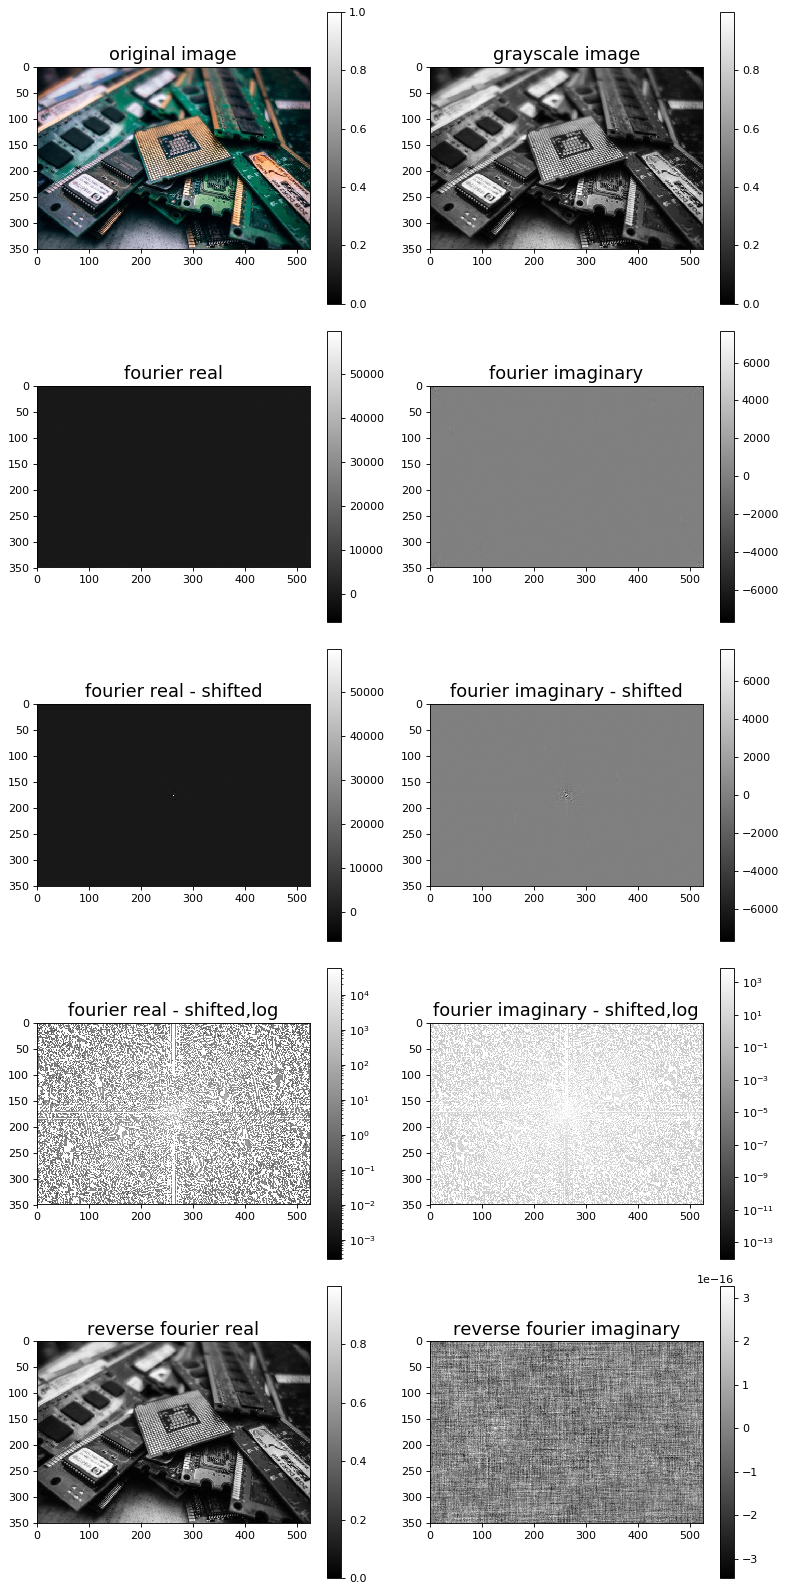

In [3]:
#2D fourier of image with numpy
%reset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpc

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])


pic = plt.imread('plots/example0.png') #350x525x4 array
bw_pic = rgb2gray(pic) #350x525x1 array
fourier = np.fft.fft2(bw_pic)
fourier_shift = np.fft.fftshift(fourier)
reverse = np.fft.ifft2(np.fft.ifftshift(fourier_shift))




######################################

fig = plt.figure(figsize=(10,20), dpi=80, facecolor='w', edgecolor='k')
plt.gray()

plt.subplot(5,2,1)
plt.title('original image', fontsize=16)
plt.imshow(pic)
plt.colorbar()

plt.subplot(5,2,2)
plt.title('grayscale image', fontsize=16)
plt.imshow(bw_pic)
plt.colorbar()

plt.subplot(5,2,3)
plt.title('fourier real', fontsize=16)
plt.imshow(np.real(fourier))
plt.colorbar()

plt.subplot(5,2,4)
plt.title('fourier imaginary', fontsize=16)
plt.imshow(np.imag(fourier))
plt.colorbar()

plt.subplot(5,2,5)
plt.title('fourier real - shifted', fontsize=16)
plt.imshow(np.real(fourier_shift))
plt.colorbar()

plt.subplot(5,2,6)
plt.title('fourier imaginary - shifted', fontsize=16)
plt.imshow(np.imag(fourier_shift))
plt.colorbar()

plt.subplot(5,2,7)
plt.title('fourier real - shifted,log', fontsize=16)
plt.imshow(np.real(fourier_shift),norm=mpc.LogNorm())
plt.colorbar()

plt.subplot(5,2,8)
plt.title('fourier imaginary - shifted,log', fontsize=16)
plt.imshow(np.imag(fourier_shift),norm=mpc.LogNorm())
plt.colorbar()

plt.subplot(5,2,9)
plt.title('reverse fourier real', fontsize=16)
plt.imshow(np.real(reverse))
plt.colorbar()

plt.subplot(5,2,10)
plt.title('reverse fourier imaginary', fontsize=16)
plt.imshow(np.imag(reverse))
plt.colorbar()

plt.tight_layout()
plt.show

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


<function matplotlib.pyplot.show(*args, **kw)>

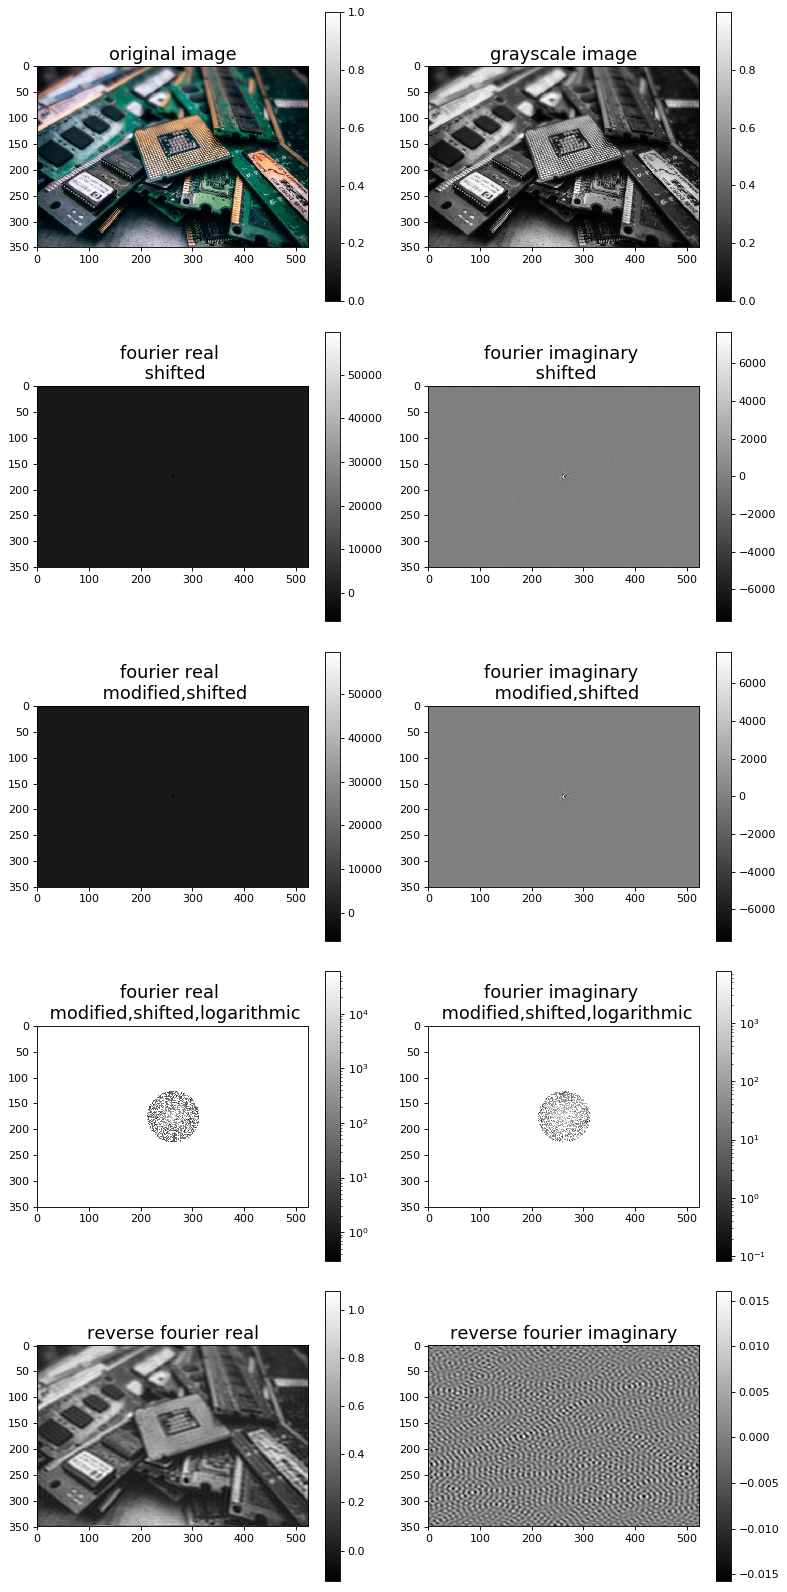

In [4]:
#2D fourier of image with numpy -> low pass filter
%reset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpc

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

def modify(img):
    r=50
    x,y = np.shape(img)
    for ii in range(0,x):
        for iii in range(0,y):
            if ((ii-x/2)**2+(iii-y/2)**2)>r**2:
                img[ii][iii]=np.complex(0,0)
    return img



fig = plt.figure(figsize=(10,20), dpi=80, facecolor='w', edgecolor='k')
plt.gray()

######################################
pic = plt.imread('plots/example0.png') #350x525x4 array
######################################
plt.subplot(5,2,1)
plt.title('original image', fontsize=16)
plt.imshow(pic)
plt.colorbar()

######################
bw_pic = rgb2gray(pic) #350x525x1 array
######################
plt.subplot(5,2,2)
plt.title('grayscale image', fontsize=16)
plt.imshow(bw_pic)
plt.colorbar()

#############################
fourier = np.fft.fft2(bw_pic)
fourier_shift = np.fft.fftshift(fourier)
########################################
plt.subplot(5,2,3)
plt.title('fourier real \n shifted', fontsize=16)
plt.imshow(np.real(fourier_shift))
plt.colorbar()

plt.subplot(5,2,4)
plt.title('fourier imaginary \n shifted', fontsize=16)
plt.imshow(np.imag(fourier_shift))
plt.colorbar()

###################################
fourier_mod = modify(fourier_shift)
###################################
plt.subplot(5,2,5)
plt.title('fourier real \n modified,shifted', fontsize=16)
plt.imshow(np.real(fourier_mod))
plt.colorbar()

plt.subplot(5,2,6)
plt.title('fourier imaginary \n modified,shifted', fontsize=16)
plt.imshow(np.imag(fourier_mod))
plt.colorbar()

plt.subplot(5,2,7)
plt.title('fourier real \n modified,shifted,logarithmic', fontsize=16)
plt.imshow(np.real(fourier_mod),norm=mpc.LogNorm())
plt.colorbar()

plt.subplot(5,2,8)
plt.title('fourier imaginary \n modified,shifted,logarithmic', fontsize=16)
plt.imshow(np.imag(fourier_mod),norm=mpc.LogNorm())
plt.colorbar()


#####################################################
reverse = np.fft.ifft2(np.fft.ifftshift(fourier_mod))
#####################################################
plt.subplot(5,2,9)
plt.title('reverse fourier real', fontsize=16)
plt.imshow(np.real(reverse))
plt.colorbar()

plt.subplot(5,2,10)
plt.title('reverse fourier imaginary', fontsize=16)
plt.imshow(np.imag(reverse))
plt.colorbar()

plt.tight_layout()
plt.show

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
kill all imaginary fourier coefficients


<function matplotlib.pyplot.show(*args, **kw)>

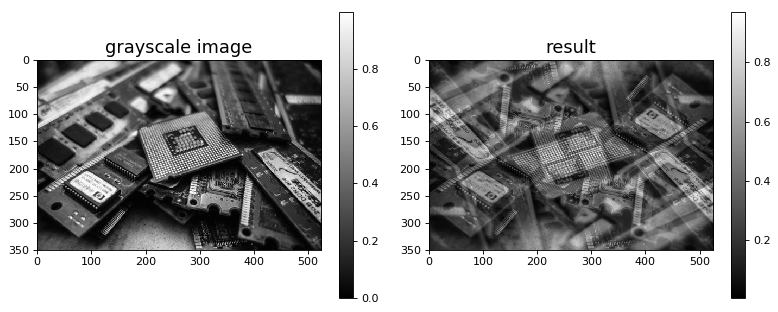

In [5]:
#2D fourier of image with numpy & no imaginary coefficients
%reset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpc

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])


######################################
pic = plt.imread('plots/example0.png') #350x525x4 array
bw_pic = rgb2gray(pic) #350x525x1 array
fourier = np.fft.fftshift( np.fft.fft2( bw_pic ) )

#kill imaginary coefficients
x,y = np.shape(fourier)
for ii in range(0,x):
    for iii in range(0,y):
        fourier[ii][iii]=np.real(fourier[ii][iii])

reverse = np.fft.ifft2( np.fft.ifftshift( fourier ) )


print('\033[1m'+'kill all imaginary fourier coefficients'+'\033[0;0m')

#####################################################

fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.gray()

plt.subplot(1,2,1)
plt.title('grayscale image', fontsize=16)
plt.imshow(bw_pic)
plt.colorbar()

plt.subplot(1,2,2)
plt.title('result', fontsize=16)
plt.imshow(np.real(reverse))
plt.colorbar()

plt.tight_layout()
plt.show

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
keep only big coefficients in fourier
158749 coeff. =0 from 183750 coeff.
25001 coeff. left
0.08669211398398058


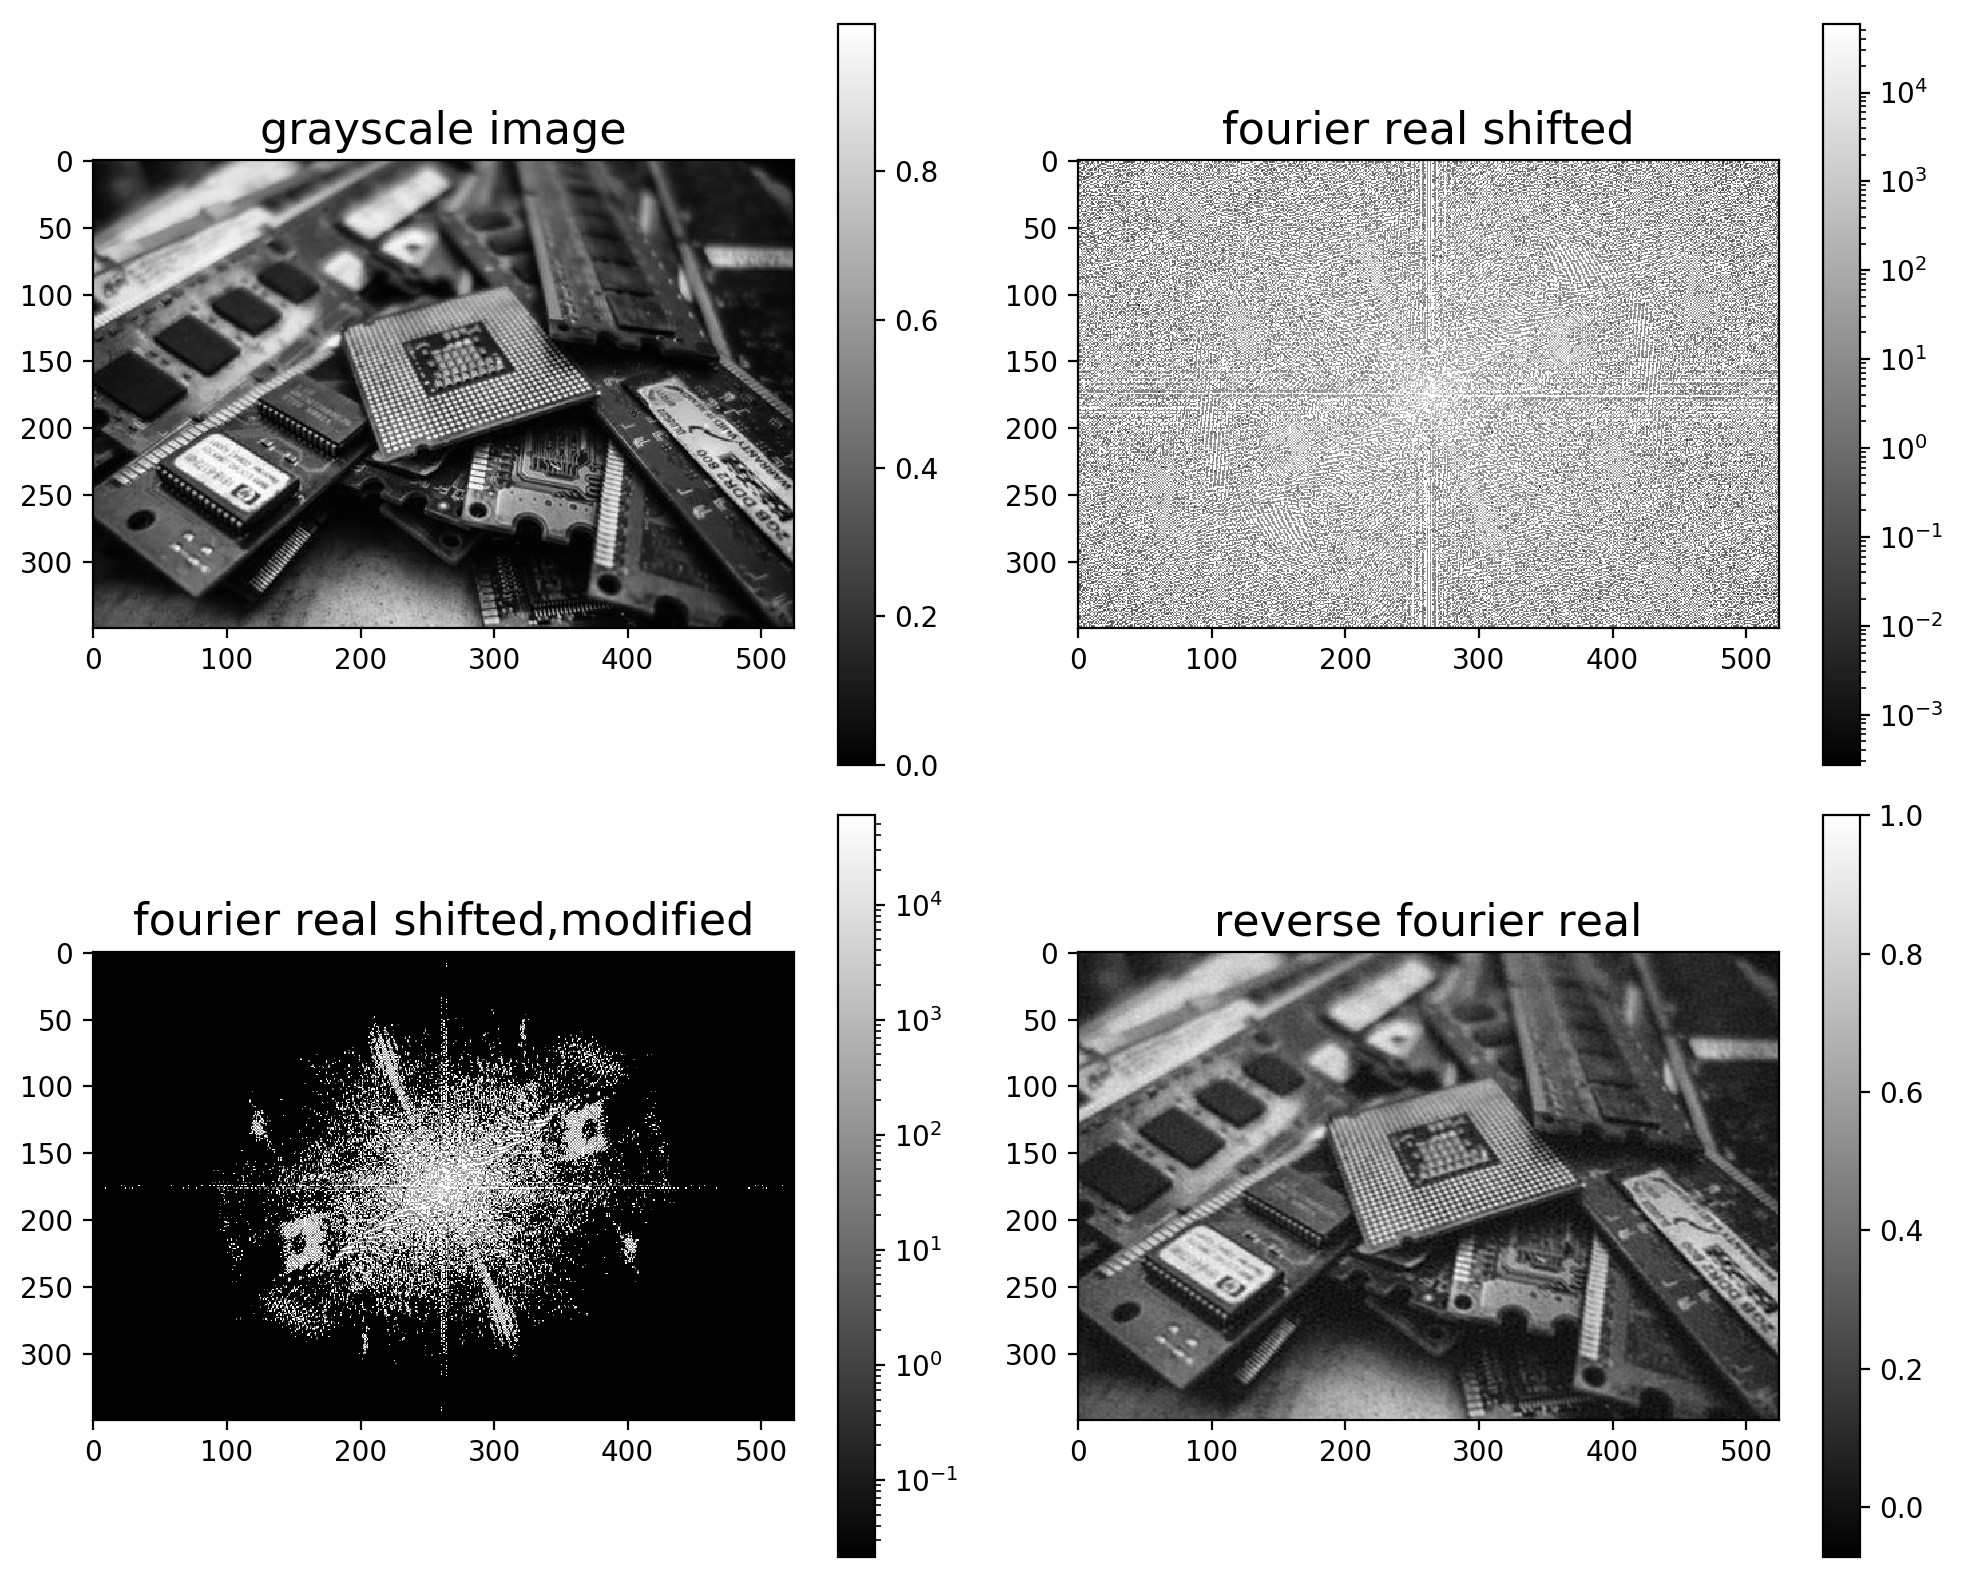

In [83]:
#2D fourier of image with numpy -> compression (keep only big coefficients)
%reset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpc

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

def sparse(f):
    threshold=42.70221
    count=0
    x,y = np.shape(f)
    for ii in range(0,x):
        for iii in range(0,y):
            if np.abs(f[ii][iii])<threshold:
                f[ii][iii]=np.complex(0,0)
                count+=1
    print(str(count)+' coeff. =0 from '+str(x*y)+' coeff.')
    print(str(x*y-count)+' coeff. left')
    return f

#get images
pic = plt.imread('plots/example0.png') #350x525x4 array
bw_pic = rgb2gray(pic) #350x525x1 array

print('\033[1m'+'keep only big coefficients in fourier'+'\033[0;0m')


######################################

fig = plt.figure(figsize=(10,8), dpi=200, facecolor='w', edgecolor='k')
plt.gray()


plt.subplot(2,2,1)
plt.title('grayscale image', fontsize=16)
plt.imshow(bw_pic)
plt.colorbar()
#############################
fourier = np.fft.fft2(bw_pic)
#fourier = np.transpose(np.fft.fft(np.transpose(np.fft.fft(bw_pic))))
fourier_shift = np.fft.fftshift(fourier)
########################################
plt.subplot(2,2,2)
plt.title('fourier real shifted', fontsize=16)
plt.imshow(np.real(fourier_shift),norm=mpc.LogNorm())
plt.colorbar()
#########################################
fourier_shift_mod = sparse(fourier_shift)
#########################################
plt.subplot(2,2,3)
plt.title('fourier real shifted,modified', fontsize=16)
plt.imshow(np.real(fourier_shift_mod),norm=mpc.LogNorm())
plt.colorbar()
###########################################################
reverse = np.fft.ifft2(np.fft.ifftshift(fourier_shift_mod))
reverse = reverse/np.amax(reverse)
###########################################################
plt.subplot(2,2,4)
plt.title('reverse fourier real', fontsize=16)
plt.imshow(np.real(reverse))
plt.colorbar()

plt.tight_layout()
plt.show

print(np.sum(np.abs(bw_pic)-abs(reverse))/np.sum(np.abs(bw_pic)))

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
keep only big coefficients in fourier
158749 coeff. =0 from 183750 coeff.
25001 coeff. left
0.0752003134513851


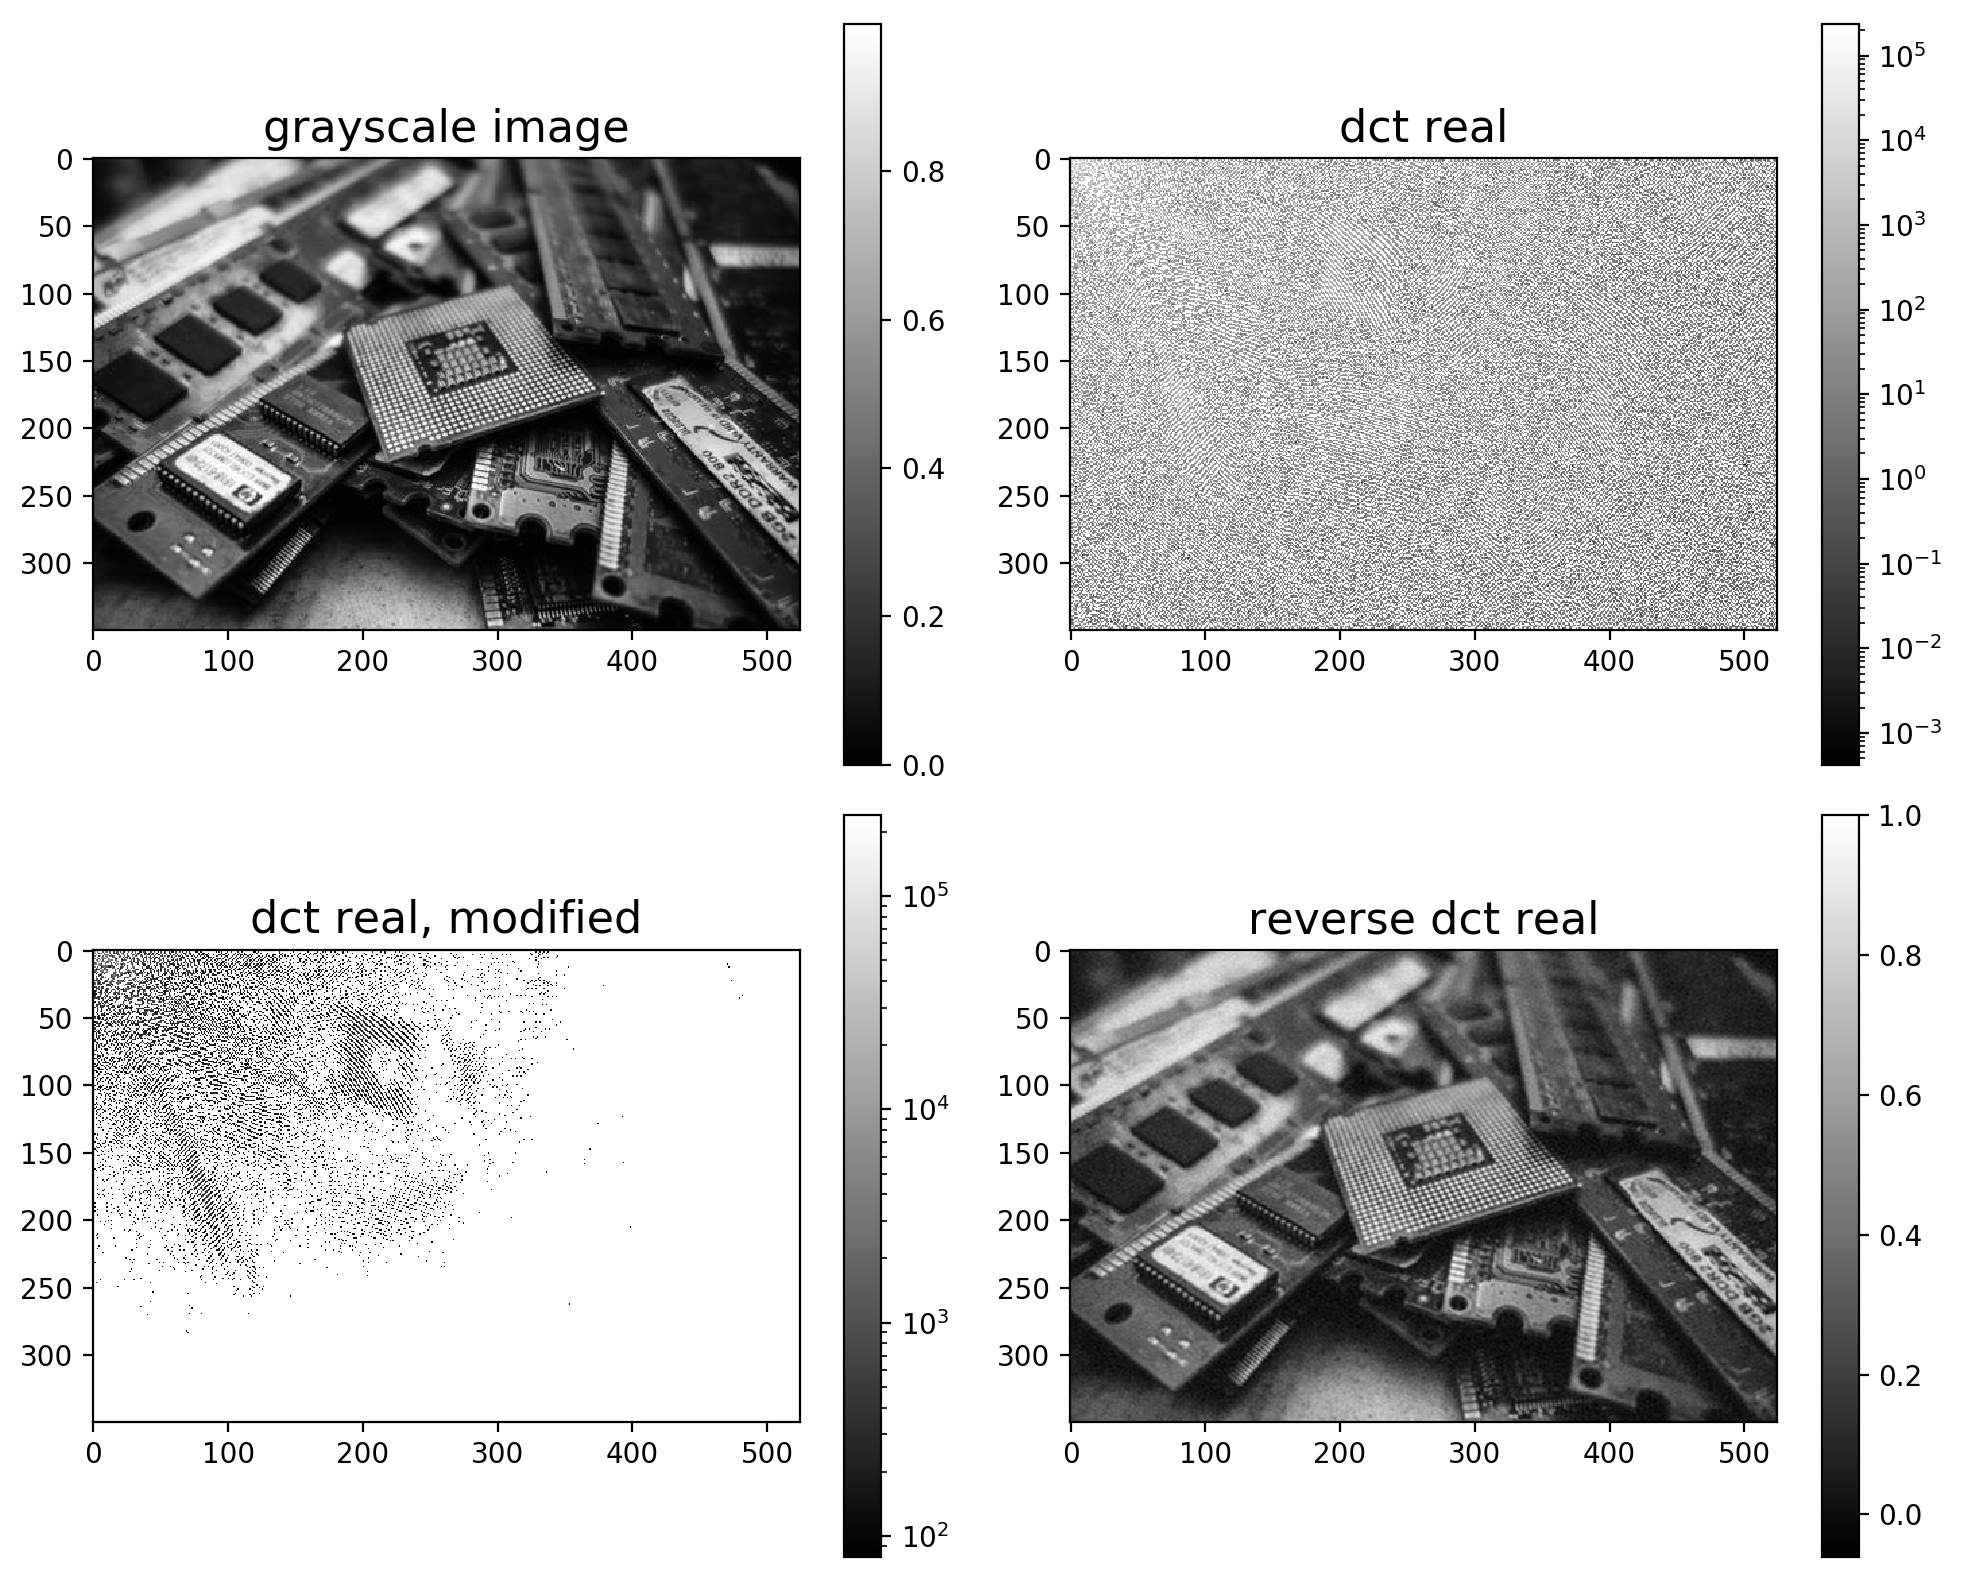

In [84]:
#2D discrete cosine transform of image with numpy -> compression (keep only big coefficients)
%reset
import numpy as np
import scipy.fftpack as fft
import matplotlib.pyplot as plt
import matplotlib.colors as mpc

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

def sparse(f):
    threshold=80.185
    count=0
    x,y = np.shape(f)
    for ii in range(0,x):
        for iii in range(0,y):
            if np.abs(f[ii][iii])<threshold:
                f[ii][iii]=0
                count+=1
    print(str(count)+' coeff. =0 from '+str(x*y)+' coeff.')
    print(str(x*y-count)+' coeff. left')
    return f

#get images
pic = plt.imread('plots/example0.png') #350x525x4 array
bw_pic = rgb2gray(pic) #350x525x1 array

print('\033[1m'+'keep only big coefficients in fourier'+'\033[0;0m')


######################################

fig = plt.figure(figsize=(10,8), dpi=200, facecolor='w', edgecolor='k')
plt.gray()


plt.subplot(2,2,1)
plt.title('grayscale image', fontsize=16)
plt.imshow(bw_pic)
plt.colorbar()
#############################
fourier = fft.dct(fft.dct(bw_pic, axis=0),axis=1)
########################################
plt.subplot(2,2,2)
plt.title('dct real', fontsize=16)
plt.imshow(np.real(fourier),norm=mpc.LogNorm())
plt.colorbar()
#########################################
fourier_mod = sparse(fourier)
#########################################
plt.subplot(2,2,3)
plt.title('dct real, modified', fontsize=16)
plt.imshow(np.real(fourier_mod),norm=mpc.LogNorm())
plt.colorbar()
###########################################################
reverse = fft.idct(fft.idct(fourier_mod, axis=0),axis=1)
reverse = reverse/np.amax(reverse)
###########################################################
plt.subplot(2,2,4)
plt.title('reverse dct real', fontsize=16)
plt.imshow(np.real(reverse))
plt.colorbar()

plt.tight_layout()
plt.show

print(np.sum(np.abs(bw_pic)-abs(reverse))/np.sum(np.abs(bw_pic)))

In [1]:
#performance comparison of different transforms on i7-7700HQ
%reset
import numpy as np
import scipy.fftpack as fft

xn = np.round(np.random.rand(1000),1)*10

%timeit fft.fft(xn)
%timeit fft.rfft(xn)
%timeit fft.dct(xn, type=2)
%timeit fft.dst(xn, type=2)


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
10.1 µs ± 173 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
10.9 µs ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
19.2 µs ± 2.72 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
19.7 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
